![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here 
sales = pd.read_csv(link, encoding = 'latin1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
sales.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
brief_info = sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
# Your code here
sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [6]:
# List all NaN values
sales[sales['Description'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/10 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/10 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/10 16:50,0.0,NaN,United Kingdom


In [7]:
sales[sales['CustomerID'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


**Exclude negative Quatity entries**

In [8]:
sales_nonull = sales.dropna()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [0]:
#sales_nonull[sales_nonull['CustomerID'].isnull()].head(5)

In [9]:
sales_nonull = sales_nonull[sales_nonull.Quantity >=0]
#sales_nonull.head(10)
sales_nonull.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
291309,562444,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2,8/4/11 18:44,6.95,14713.0,United Kingdom
154464,549914,22894,TABLECLOTH RED APPLES DESIGN,4,4/13/11 9:32,9.95,14931.0,Channel Islands
118188,546423,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,1,3/13/11 12:39,8.50,14502.0,United Kingdom
108675,545559,82600,NO SINGING METAL SIGN,1,3/3/11 15:31,2.10,15005.0,United Kingdom
346814,567205,23350,ROLL WRAP VINTAGE SPOT,12,9/19/11 10:44,1.25,15365.0,United Kingdom
362030,568402,21642,ASSORTED TUTTI FRUTTI PEN,24,9/27/11 10:34,0.29,16629.0,United Kingdom
312791,564372,22383,LUNCH BAG SUKI DESIGN,10,8/25/11 9:55,1.65,12714.0,France
465231,576215,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,12,11/14/11 12:55,2.95,17652.0,United Kingdom
265891,560233,23322,LARGE WHITE HEART OF WICKER,2,7/17/11 11:10,2.95,16813.0,United Kingdom
270,536395,21314,SMALL GLASS HEART TRINKET POT,8,12/1/10 10:47,2.10,13767.0,United Kingdom


**Exclude negative Price entries**

In [10]:
sales_nonull = sales_nonull[sales_nonull.UnitPrice >=0]
sales_nonull.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279107,561236,23284,DOORMAT KEEP CALM AND COME IN,10,7/26/11 10:27,6.75,15159.0,United Kingdom
426190,573345,23167,SMALL CERAMIC TOP STORAGE JAR,2,10/30/11 12:14,0.83,17609.0,United Kingdom
390507,570555,20724,RED RETROSPOT CHARLOTTE BAG,10,10/11/11 11:03,0.85,17119.0,United Kingdom
533122,581014,22384,LUNCH BAG PINK POLKADOT,10,12/7/11 9:34,1.65,16458.0,United Kingdom
313905,564552,20754,RETROSPOT RED WASHING UP GLOVES,6,8/25/11 17:22,2.10,16670.0,United Kingdom
348695,567462,22457,NATURAL SLATE HEART CHALKBOARD,2,9/20/11 12:35,2.95,14446.0,United Kingdom
126899,547106,22107,PIZZA PLATE IN BOX,1,3/21/11 11:24,3.75,15039.0,United Kingdom
384102,570103,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,10/7/11 12:18,2.08,15719.0,United Kingdom
485665,577615,21197,MULTICOLOUR CONFETTI IN TUBE,12,11/21/11 10:22,1.65,12658.0,Germany
441030,574559,21790,VINTAGE SNAP CARDS,6,11/4/11 15:50,0.85,14056.0,United Kingdom


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [11]:
# Your code here
sales_nonull.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(1)

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1


**The customer with the highest money spent on purchases comes from Netherlands**

> Indented block



In [0]:
sales_nonull['MoneySpent'] = sales_nonull['Quantity'] * sales_nonull['UnitPrice']
#sales_nonull.head(5)


In [13]:
# Your code here
money = sales_nonull.groupby(by=['CustomerID','Country'], as_index = False)['MoneySpent'].sum()
#money.info()
money.sort_values(by='MoneySpent', ascending=False).head(1)


,CustomerID,Country,MoneySpent
1698,14646.0,Netherlands,280206.02


**Add years, months and hour column**

In [14]:
sales_nonull['InvoiceDate'] = pd.to_datetime(sales_nonull.InvoiceDate, format='%m/%d/%y %H:%M')
sales_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
MoneySpent     397924 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [0]:
sales_nonull.insert(loc=2, column='Year', value=sales_nonull['InvoiceDate'].map(lambda x: x.year))
sales_nonull.insert(loc=3, column='Month', value=sales_nonull.InvoiceDate.dt.month)
sales_nonull.insert(loc=4, column='Day', value=(sales_nonull.InvoiceDate.dt.dayofweek)+1)
sales_nonull.insert(loc=5, column='Hour', value=sales_nonull.InvoiceDate.dt.hour)
sales_nonull.insert(loc=6, column='Year_Month', value=sales_nonull['InvoiceDate'].map(lambda x: 100*x.year + x.month))


In [16]:
sales_nonull.sample(10)

,InvoiceNo,StockCode,Year,Month,Day,Hour,Year_Month,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MoneySpent
102361,545014,22727,2011,2,5,13,201102,ALARM CLOCK BAKELIKE RED,4,2011-02-25 13:15:00,3.75,18223.0,United Kingdom,15.00
353643,567818,47566,2011,9,4,12,201109,PARTY BUNTING,4,2011-09-22 12:41:00,4.95,14395.0,United Kingdom,19.80
125142,547022,22981,2011,3,5,15,201103,PANTRY APPLE CORER,1,2011-03-18 15:44:00,1.45,17961.0,United Kingdom,1.45
506445,579141,22086,2011,11,1,13,201111,PAPER CHAIN KIT 50'S CHRISTMAS,1,2011-11-28 13:06:00,2.95,17019.0,United Kingdom,2.95
407398,571883,23417,2011,10,3,13,201110,BATHROOM HOOK,2,2011-10-19 13:58:00,1.65,14704.0,United Kingdom,3.30
134715,547864,22249,2011,3,7,13,201103,DECORATION WHITE CHICK MAGIC GARDEN,1,2011-03-27 13:10:00,0.85,15716.0,United Kingdom,0.85
523366,580509,21914,2011,12,7,13,201112,BLUE HARMONICA IN BOX,12,2011-12-04 13:45:00,1.25,12719.0,France,15.00
266045,560239,23229,2011,7,7,11,201107,VINTAGE DONKEY TAIL GAME,6,2011-07-17 11:50:00,3.75,13507.0,United Kingdom,22.50
147617,549126,85038,2011,4,3,14,201104,6 CHOCOLATE LOVE HEART T-LIGHTS,2,2011-04-06 14:23:00,2.10,16031.0,United Kingdom,4.20
114748,546083,22152,2011,3,3,11,201103,PLACE SETTING WHITE STAR,24,2011-03-09 11:27:00,0.42,12971.0,United Kingdom,10.08


** *italicized text* On which year had the highest sales?**

In [17]:
# Your code here
sales_nonull.groupby(by=['Year'])['Quantity'].sum().max()


4869416

**How many orders (per hour)?**

In [18]:
sales_nonull.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: Hour, dtype: int64

**Make a plot about number of orders per hour**

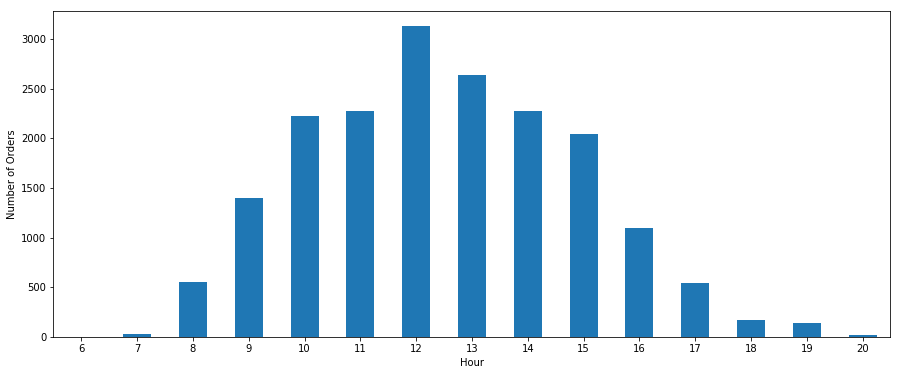

In [19]:
hour_plot = sales_nonull.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',figsize=(15,6))
hour_plot.set_xlabel('Hour',fontsize=10)
hour_plot.set_ylabel('Number of Orders',fontsize=10)
hour_plot.set_xticklabels(range(6,21), rotation='horizontal', fontsize=10)
plt.show()

**How many orders (per month)?**

In [20]:
sales_nonull.groupby('InvoiceNo')['Year_Month'].unique().value_counts().iloc[:-1].sort_index()

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
Name: Year_Month, dtype: int64

**Make a plot about number of orders per month**

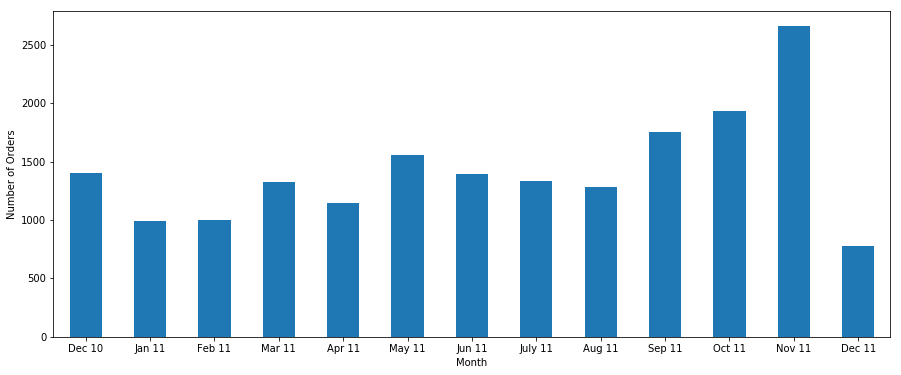

In [21]:
ax = sales_nonull.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=10)
ax.set_ylabel('Number of Orders',fontsize=10)
ax.set_xticklabels(('Dec 10','Jan 11','Feb 11','Mar 11','Apr 11','May 11','Jun 11','July 11','Aug 11','Sep 11','Oct 11','Nov 11','Dec 11'), rotation='horizontal', fontsize=10)
plt.show()

** *italicized text*Top 10 items most sales**

In [22]:
sales_nonull.sort_values(by=['Quantity'], ascending = False).head(10)

,InvoiceNo,StockCode,Year,Month,Day,Hour,Year_Month,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MoneySpent
540421,581483,23843,2011,12,5,9,201112,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,2011,1,2,10,201101,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
502122,578841,84826,2011,11,5,15,201111,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,0.00
421632,573008,84077,2011,10,4,12,201110,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,1008.00
206121,554868,22197,2011,5,5,10,201105,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,3096.00
97432,544612,22053,2011,2,2,10,201102,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92
270885,560599,18007,2011,7,2,17,201107,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,191.16
52711,540815,21108,2011,1,2,12,201101,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
160546,550461,21108,2011,4,1,13,201104,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40
433788,573995,16014,2011,11,3,11,201111,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom,960.00


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

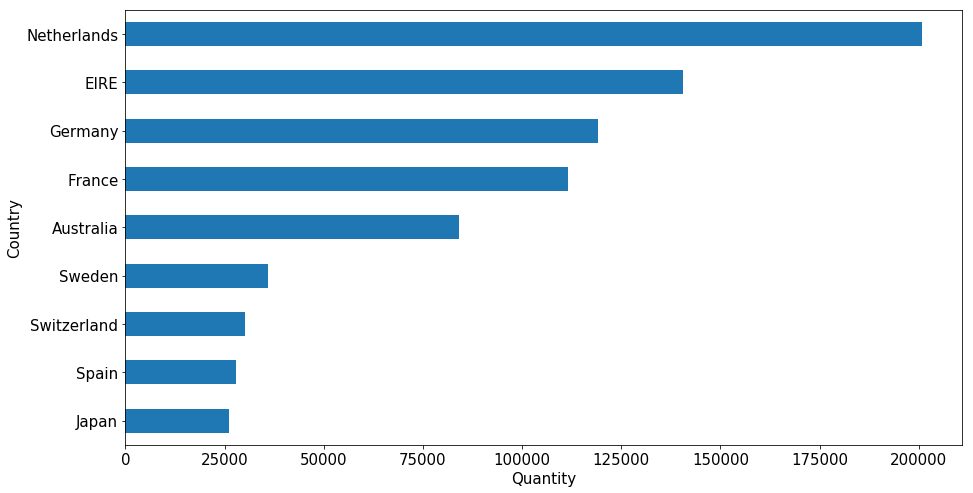

In [23]:
# Your code here
group_country_amount_spent = sales_nonull.groupby('Country')['Quantity'].sum().sort_values().tail(10)
del group_country_amount_spent['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=15)
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.show()

# What can you tell about this?

### You are awesome!!